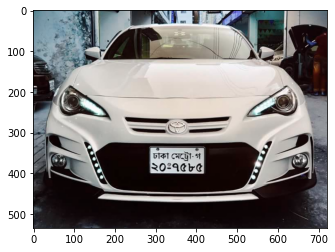

In [1]:
import cv2 #we import the openCV library.
img = cv2.imread("167.jpg") # we use imread function to read the image 
# Now the image in img variable 
# we use another library called matplotlib to␣ show the image.
import matplotlib.pyplot as plt 
plt.imshow(img)

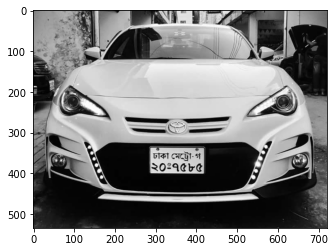

In [2]:
# Lets make it grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.show()


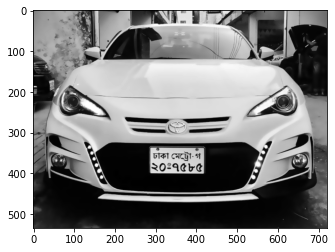

In [3]:
filter = cv2.bilateralFilter(gray, 11, 17, 17)
plt.imshow(filter, cmap='gray')

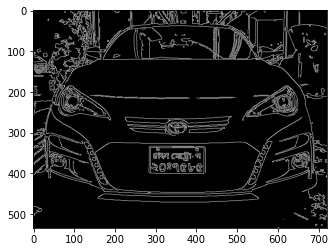

In [4]:
edge = cv2.Canny(filter, 30, 200)
plt.imshow(edge, cmap='gray')


In [5]:
ext_count = cv2.findContours(edge.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


In [6]:
import imutils
contours = imutils.grab_contours(ext_count)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [7]:
location = None
for contour in contours:
    apprx = cv2.approxPolyDP(contour, 10, True)
    if len(apprx) == 4:
        location = apprx
        break

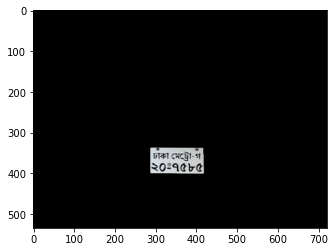

In [8]:
import numpy as np
msk = np.zeros(gray.shape, np.uint8)
extracted_plate = cv2.drawContours(msk, [location], 0, 255, -1)
extracted_plate = cv2.bitwise_and(img, img, mask=msk)
plt.imshow(extracted_plate, cmap='gray')

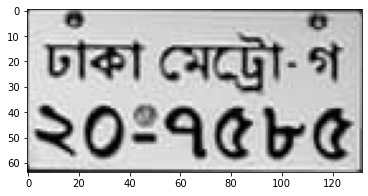

In [9]:
(x, y) = np.where(msk == 255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
final_plate = gray[x1:x2 + 1, y1:y2 + 1]
plt.imshow(final_plate, cmap='gray')

In [10]:
import easyocr
reader = easyocr.Reader(['bn'])
detected = reader.readtext(final_plate)
print(detected)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


AttributeError: module 'PIL.Image' has no attribute 'Resampling'

In [ ]:
!pip show pillow

In [11]:
!pip show opencv-python

Name: opencv-python
Version: 4.6.0.66
Summary: Wrapper package for OpenCV python bindings.
Home-page: https://github.com/skvark/opencv-python
Author: 


Author-email: 
License: MIT
Location: c:\programdata\anaconda3\lib\site-packages
Requires: numpy, numpy, numpy
Required-by: 
